# Preliminaries/Importing Data for Weather Problems

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

file = 'US_WeatherEvents_2016-2019.csv'
df = pd.read_csv(file)

## Q1: How many snow events were recorded?
 A: 679,472 snow events were recorded

In [15]:
df['Type'].value_counts()

Rain             3067581
Fog              1068653
Snow              679472
Cold              141626
Precipitation      67299
Storm              32688
Hail                2514
Name: Type, dtype: int64

## Q2: How many moderate snow events were recorded each year? Produce a table and line plot

A: Plot and table below
<br>Found by summing occurrences of year substring in StartTime(UTC) column (created subset of only moderate snow events)

   Year  Count
0  2016  16900
1  2017  15779
2  2018  18684
3  2019  22278


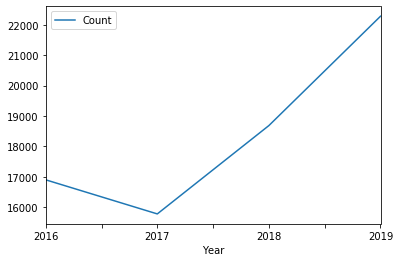

In [141]:
#subset with moderate snow events
modSnow = df[df.Severity.isin(['Moderate']) & df.Type.isin(['Snow'])]

pieces = []
years = ['2016', '2017', '2018', '2019']

#summing occurence of the year in the strings
for year in years:
    snowcount = modSnow['StartTime(UTC)'].str.count(str(year)).sum()
    pieces.append(snowcount)

frame = { 'Year': years, 'Count': pieces} 
df4 = pd.DataFrame(frame)
print(df4)

#line plot
df4.plot(x = 'Year', y = 'Count', kind = 'line')
plt.show()

## Q3: How many snow events were recorded in each state?

A: Values counted below
<br>Checked value counts for each state in subset of snow events

In [264]:
snow = df[df['Type'] == 'Snow']
snow['State'].value_counts()

MI    76455
MN    74201
WI    46691
WY    43646
CO    38218
ND    33522
NY    28592
IA    26408
MT    23906
OH    20848
PA    19555
ID    19491
IL    17429
NE    16751
SD    16491
ME    13821
IN    12838
WA    12737
VT    10124
NH     9856
MA     9595
VA     9012
OR     8988
CA     8727
WV     8423
UT     8386
NM     7561
NV     5852
KS     5758
MO     5662
KY     5449
AZ     4973
NC     4820
NJ     3695
TX     3351
CT     3200
OK     3078
MD     2842
RI     1530
AR     1461
TN     1302
GA     1021
SC      837
AL      701
DE      663
MS      535
LA      401
FL       69
Name: State, dtype: int64

## Q4: How many snow events were recorded each hour?

A: There were 1763487 hours of snow total. Table for each hour below.

Found length of snow events then incremented value for each hour based on length of snow event

In [128]:
snow = df[df.Type.isin(['Snow'])]
totalHours = 0
frame = { '00': 0, '01': 0, '02': 0, '03': 0, '04': 0,
        '05': 0 , '06': 0, '07': 0, '08': 0, '09': 0,
        '10': 0, '11': 0, '12': 0, '13': 0, '14': 0,
        '15': 0, '16': 0, '17': 0, '18': 0, '19': 0,
        '20': 0, '21': 0, '22': 0, '23': 0} 

#calculates length of snow and finds for each hours
for i, j in zip(snow['StartTime(UTC)'], snow['EndTime(UTC)']):
    snowEventHours = int(str(j[11:13])) - int(str(i[11:13])) + 1
    
    #checking for special cases
    if snowEventHours < 0:
        snowEventHours = snowEventHours + 24
    if snowEventHours == 0:
        snowEventHours = snowEventHours + 1
        
    #summing for total hours
    totalHours = totalHours + snowEventHours
    
    #given how many hours event went for, increment value for each hour starting from starting hour
    for hour in range(snowEventHours):
        frame[i[11:13]] = frame.get(i[11:13] , 0) + 1

print(totalHours)
frame

1763487


{'00': 71585,
 '01': 71243,
 '02': 71802,
 '03': 70003,
 '04': 72201,
 '05': 72836,
 '06': 73973,
 '07': 73229,
 '08': 74596,
 '09': 75125,
 '10': 76677,
 '11': 77197,
 '12': 78025,
 '13': 81943,
 '14': 81544,
 '15': 77067,
 '16': 72259,
 '17': 71417,
 '18': 69207,
 '19': 69906,
 '20': 69825,
 '21': 69617,
 '22': 71001,
 '23': 71209}

## Q5: How many events of each severity did San Diego have? Produce a table and bar plot.

A: Table and Plot below

Light       584100
Moderate     73641
Heavy        21731
Name: Severity, dtype: int64


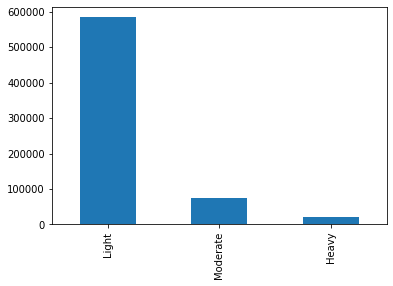

In [279]:
#subset of only San Diego weather events
sd = df[df['City'] == 'San Diego']
count = snow['Severity'].value_counts()

print(count)

count.plot(x = 'Severity', y = 'Count', kind = 'bar')
plt.show()

# Preliminaries/Importing Data for Trump Tweets Problems

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

file = 'trumptweets.csv'
df = pd.read_csv(file)


## Q1: How many tweets did the President make each year? Produce a table of results and plot the values

A: Table and Plot below
<br>Found by summing the occurrence of the year in the strings then created dataframe for table and plot 

    Year  Count
0   2009     56
1   2010    143
2   2011    870
3   2012   4190
4   2013   8207
5   2014   5987
6   2015   7719
7   2016   3951
8   2017   2232
9   2018   2998
10  2019   4588
11  2020    181


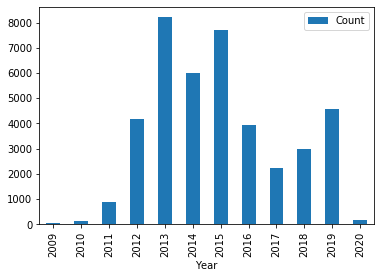

In [4]:
pieces = []
years = list(range(2009,2021))

#summing occurence of the year in the strings
for year in years:
    numTweets = df.date.str.count(str(year)).sum()
    pieces.append(numTweets)

frame = { 'Year': years, 'Count': pieces} 
df2 = pd.DataFrame(frame)

print(df2)
df2.plot(x = 'Year', y = 'Count', kind = 'bar')
plt.show()

## Q2: How many tweets contain "Fake News"?

A: There were 494 occurrences of "Fake News" specifically.

Counts:
<br>"Fake News": 494
<br>"fake News": 0
<br>"fake news": 11
<br>"Fake news": 1
<br>"FAKE NEWS": 74
<br>Total: 580

In [112]:
FakeNews = df.content.str.count("Fake News").sum()
fakeNews = df.content.str.count("fake News").sum()
fakenews = df.content.str.count("fake news").sum()
Fakenews = df.content.str.count("Fake news").sum()
FAKENEWS = df.content.str.count("FAKE NEWS").sum()

#checking all regardless of capitalization
fakenewsall = df.content.str.upper()
count = fakenewsall.str.count("FAKE NEWS").sum()

print(FakeNews)
print(fakeNews)
print(fakenews)
print(Fakenews)
print(FAKENEWS)
print(count)

total = fakeNews + FakeNews + fakenews + Fakenews + FAKENEWS
print(total)

494
0
11
1
74
580
580


## Q3: A tweet with the location could be considered a security issue as it would give the current location of the President. How many tweets contain a location?

A: There are 0 tweets with a location/geotag

In [3]:
df.info()

print(len(df[df['geo'].notnull()]))

null = df['geo'].isnull()
#len(null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
id           41122 non-null int64
link         41122 non-null object
content      41122 non-null object
date         41122 non-null object
retweets     41122 non-null int64
favorites    41122 non-null int64
mentions     22467 non-null object
hashtags     5810 non-null object
geo          0 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB
0


## Q4: How many tweets were done each hour? Produce a table and a plot.

A: Plot and Table below
<br>Summed occurrences of each hour in the date strings then created dataframe for table and plot purposes

   Hour  Count
0    00   1620
1    01   1522
2    02   1795
3    03   1974
4    04   2076
5    05   1258
6    06    831
7    07    400
8    08    347
9    09    321
10   10    458
11   11    706
12   12   1377
13   13   2226
14   14   2448
15   15   2544
16   16   2319
17   17   2146
18   18   2025
19   19   2095
20   20   2696
21   21   3184
22   22   3050
23   23   1704


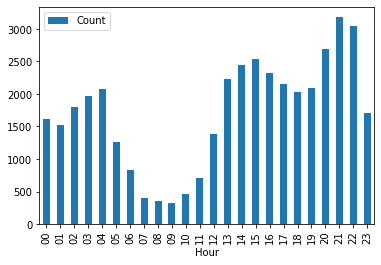

In [94]:
clock = list(range(0,24))
hours = [str(hour).zfill(2) for hour in clock]

pieces = []
frame = { 'Hour': hours, 'Count': pieces} 

#splitting up date column to only have hours
hoursOnly = df.date.str[11:13]

#summing occurrences of each hour
for hour in hours:
    numTweets = hoursOnly.str.count(hour).sum()
    pieces.append(numTweets)

df2 = pd.DataFrame(frame)

print(df2)

df2.plot(x = 'Hour', y = 'Count', kind = 'bar')
plt.show()

#df2['Count'].sum()